<a href="https://colab.research.google.com/github/coryncates/Prediction-of-Product-Sales/blob/main/Copy_of_PredictionOfProdSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  - Author: Cory N. Cates
## Project Overview
## Load and Inspect Data


# Questions to be addressed for this exercise:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Here is the Data Dictionary for this dataset:

In [ ]:
# Mount google drive and import necessary libraries

from google.colab import drive
drive.mount ('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

Mounted at /content/drive


In [ ]:
# Save path of file and inspect data

fpath= ('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/sales_predictions_2023.csv')

df_predict = pd.read_csv(fpath)
df_predict.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Further data analysis
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- There are 8523 Rows with 12 columns

## Clean Data

In [ ]:
# Getting shape of df
df_predict.shape

(8523, 12)

In [ ]:
# Checking the variable data types

df_predict.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- There are zero Unamed columns.
- Nothing that stands out in regards to the datatypes.

In [ ]:
# Checking for duplicates

df_predict.duplicated().sum()

0

In [ ]:
# Checking for Missing values
df_predict.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Checking for Missing values

df_sum = df_predict.isna().sum()
df_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 rows that are missing for Item_Weight and 2410 for Outlet_type

In [ ]:
# Identify the percentage missing
df_perc = df_predict.isna().sum() / len(df_predict) * 100
df_perc

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: >

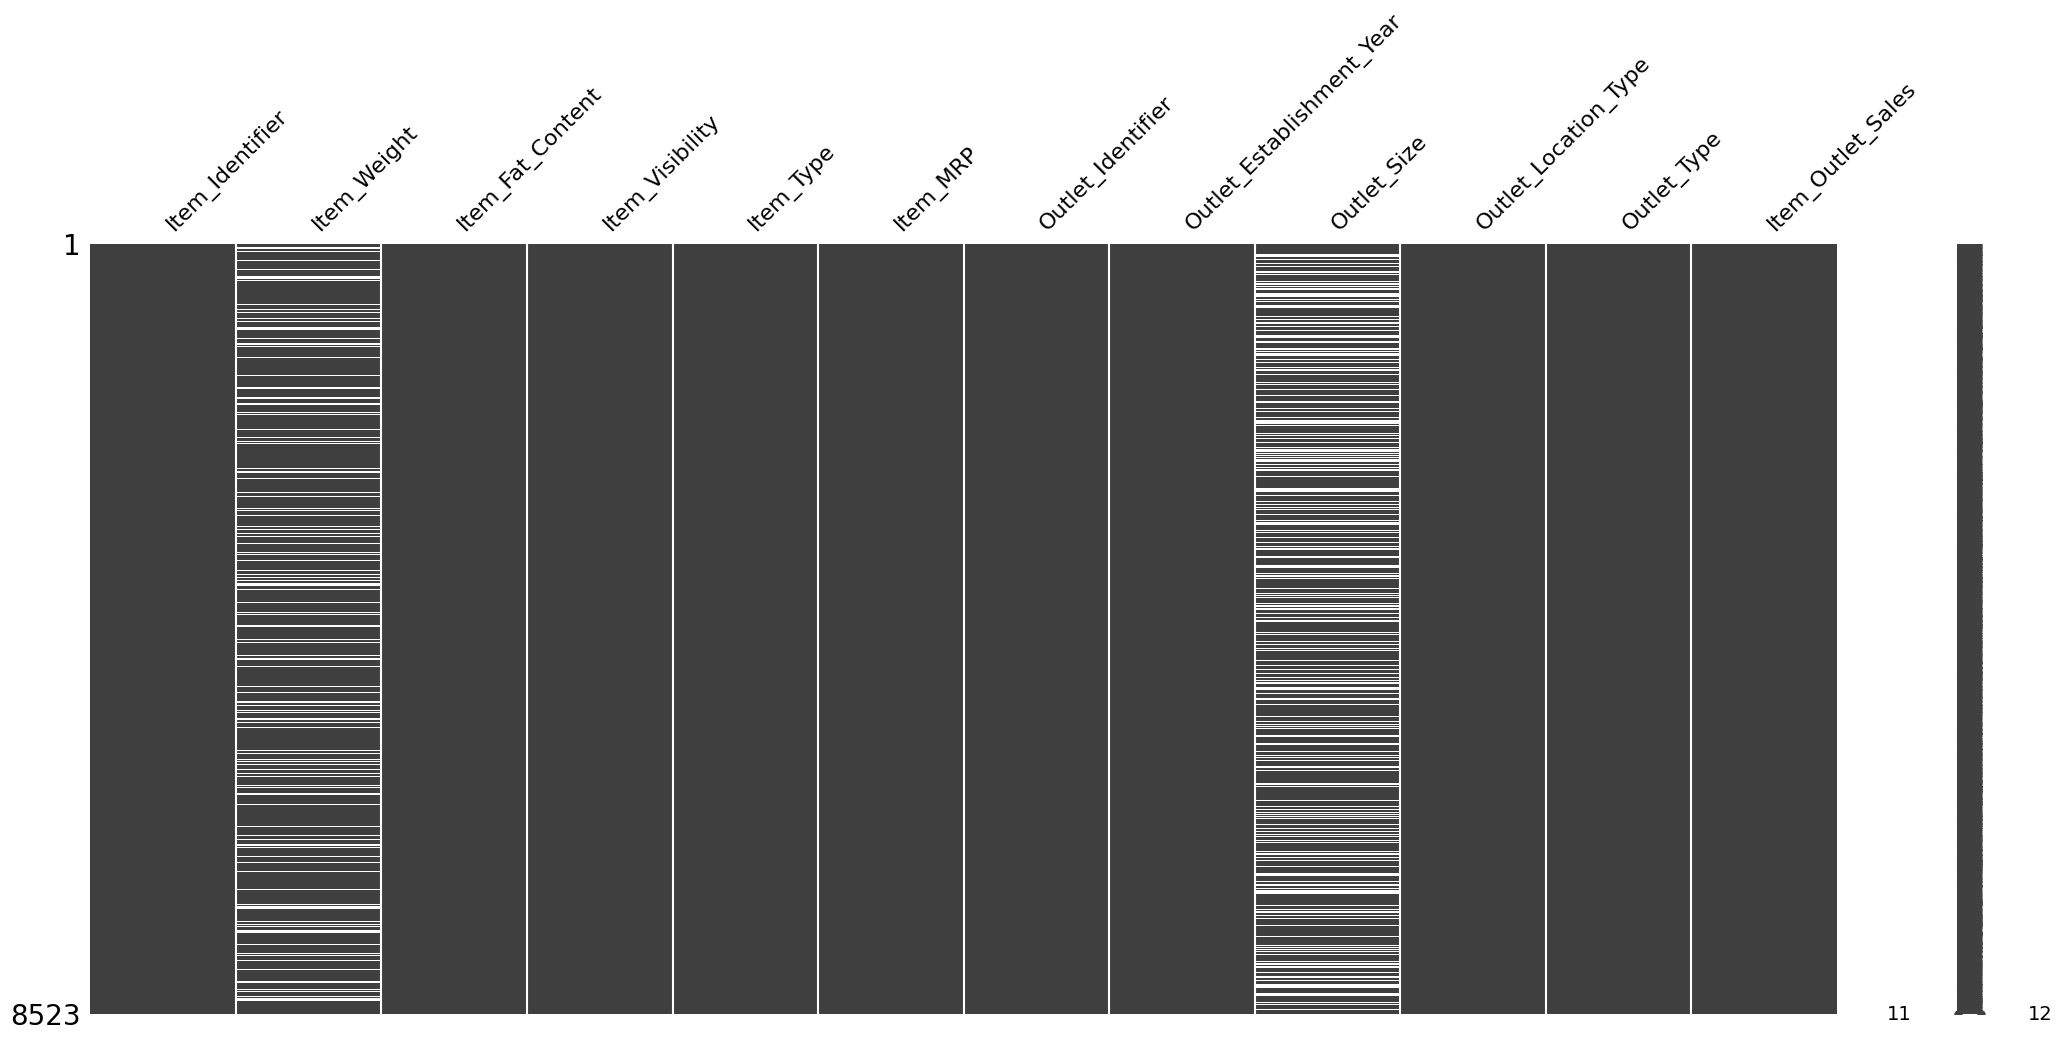

In [ ]:
#Visualizing Null values with missingno; importing libraries as well
import missingno as msno
msno.matrix(df_predict)

- Addressing missing values

In [ ]:
# Saving name of num names for number columns
num_cols = df_predict.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Use the list of num names to fill null values with a -2
df_predict[num_cols] = df_predict[num_cols].fillna(-2)
df_predict[num_cols].isna().sum() # Confirms that missing values have been replaced

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Saving list of column names for object cols
cat_cols = df_predict.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df_predict[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
# Use the list of cat names to fill null values with a UNKNOWN
df_predict[cat_cols] = df_predict[cat_cols].fillna('UNKNOWN')
df_predict[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

- Confirm no more missing values

In [ ]:
# Confirm is values are missing
num = df_predict[num_cols].isna().sum()
cat = df_predict[cat_cols].isna().sum()

print(num)
print(cat)

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64


In [ ]:
# Identify string columns to look for discrepancies
string_cols = df_predict.select_dtypes("object").columns
string_cols
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_predict[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
# Fixing discrepancies that are shown in Item_Fat_Content
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('reg', 'Regular')
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('LF', 'Low Fat')
df_predict['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Statistical analysis of the dataframe (Max, Min, Mean)
df_predict.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.307283,0.066132,140.992782,1997.831867,2181.288914
std,7.017965,0.051598,62.275067,8.371760,1706.499616
min,-2.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


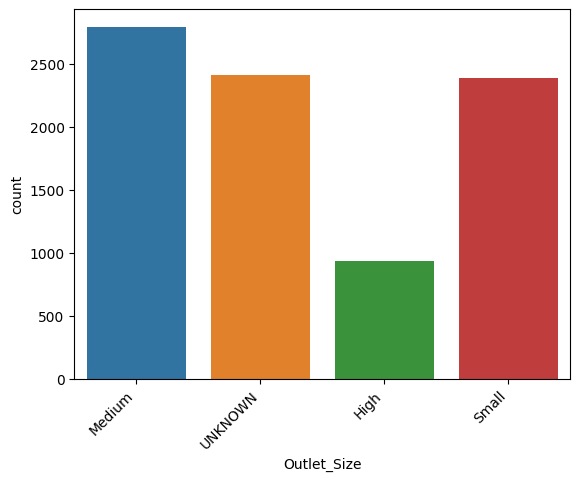

In [ ]:
# Evaluating the Outlet Size column's counts

ax = sns.countplot(data = df_predict, x = 'Outlet_Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- Considering the amount that "Unknown" posesses, it would be good to determine what this data is.

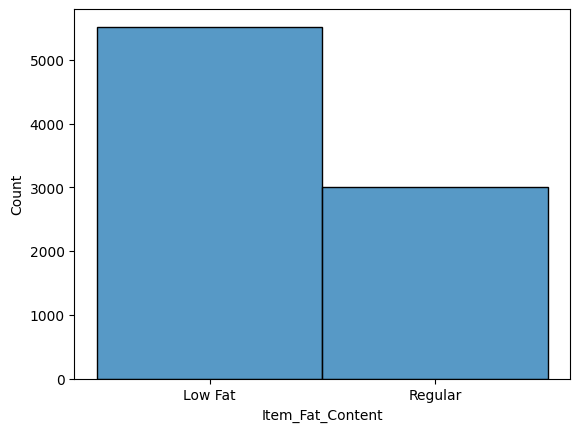

In [ ]:
ax = sns.histplot(data = df_predict, x = 'Item_Fat_Content')

-  Low fat considerably higher count

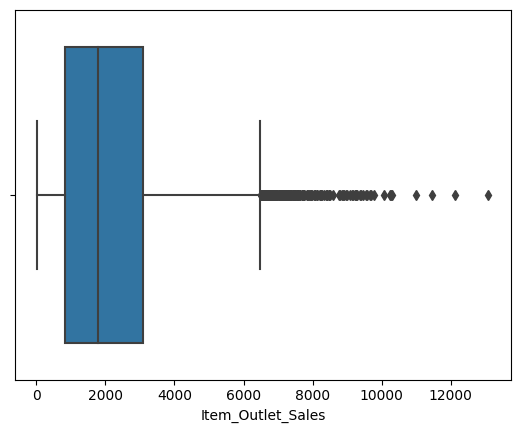

In [ ]:
# Create a boxplot of smoker vs. charges
ax = sns.boxplot(data=df_predict, x= 'Item_Outlet_Sales')

- Median sales close to 2000.  There are tons of outliers that seem to be hard to determine from this view.

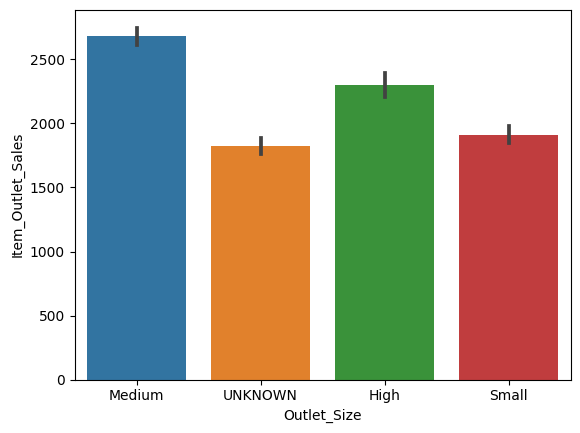

In [ ]:
ax = sns.barplot(data = df_predict, y = 'Item_Outlet_Sales', x ='Outlet_Size')

- Medium seems to be outperforming the lot

In [ ]:
# Defining variable for heatmap# Adding annotation to see the values
corr = df_predict.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.55,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.55,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


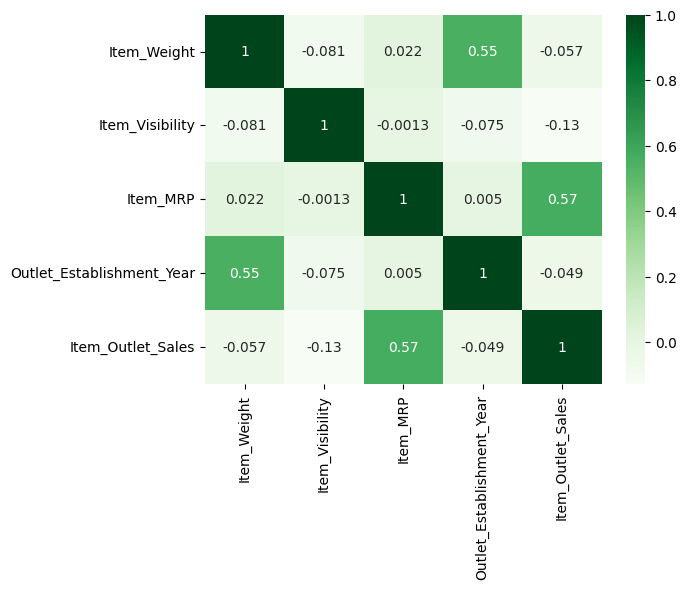

In [ ]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

- It is a correlation between item_mrp an item_outlet_sales, however not that strong.   Looks to be at 0.57, with 1 being the strongest.

## Exploratory Data Analysis

## Explanatory Data Analysis